## Visualizando séries temporais dos modelos para cada pivô central selecionado

#### Este exemplo mostra como visualizar os resultados extraídos nos exemplos 10

### Importando bibliotecas

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

### Seleção da área de interesse

In [2]:
# Seleção do pivô
id_pivo = 97 # TODO: Defina o código do pivô de interesse
title = f'ID Pivô: {id_pivo}'

# Pasta com os resultados de séries temporais para uma seleção de pivos centrais
folder_path = 'data'

# Lista de arquivos na pasta
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
print(csv_files)


[]


### Lendo resultados

In [3]:
# Gráficos para um pivo selecionado
id_pivo = 154 # TODO: Defina o código do pivô de interesse
file = f'geesebal_pivo_{id_pivo}.csv'
title = f'ID Pivô: {id_pivo}'

# Gráfico de ET média no pivo
# ...lê a série geeSEBAL
geesebal = pd.read_csv(folder_path+f'/pivos_geesebal/geesebal_pivo_{id_pivo}.csv', index_col='date')
geesebal.index = pd.to_datetime(geesebal.index)
geesebal = geesebal.dropna()
geesebal.sort_index(inplace=True)

# ...lê a série SSEBop
ssebop = pd.read_csv(folder_path+f'/pivos_ssebop/ssebop_pivo_{id_pivo}.csv', index_col='date')
ssebop.index = pd.to_datetime(ssebop.index)
ssebop = ssebop.dropna()
ssebop.sort_index(inplace=True)

# ...lê a série PT-JPL
ptjpl = pd.read_csv(folder_path+f'/pivos_ptjpl/ptjpl_pivo_{id_pivo}.csv', index_col='date')
ptjpl.index = pd.to_datetime(ptjpl.index)
ptjpl = ptjpl.dropna()
ptjpl.sort_index(inplace=True)


### Visualizando série temporal

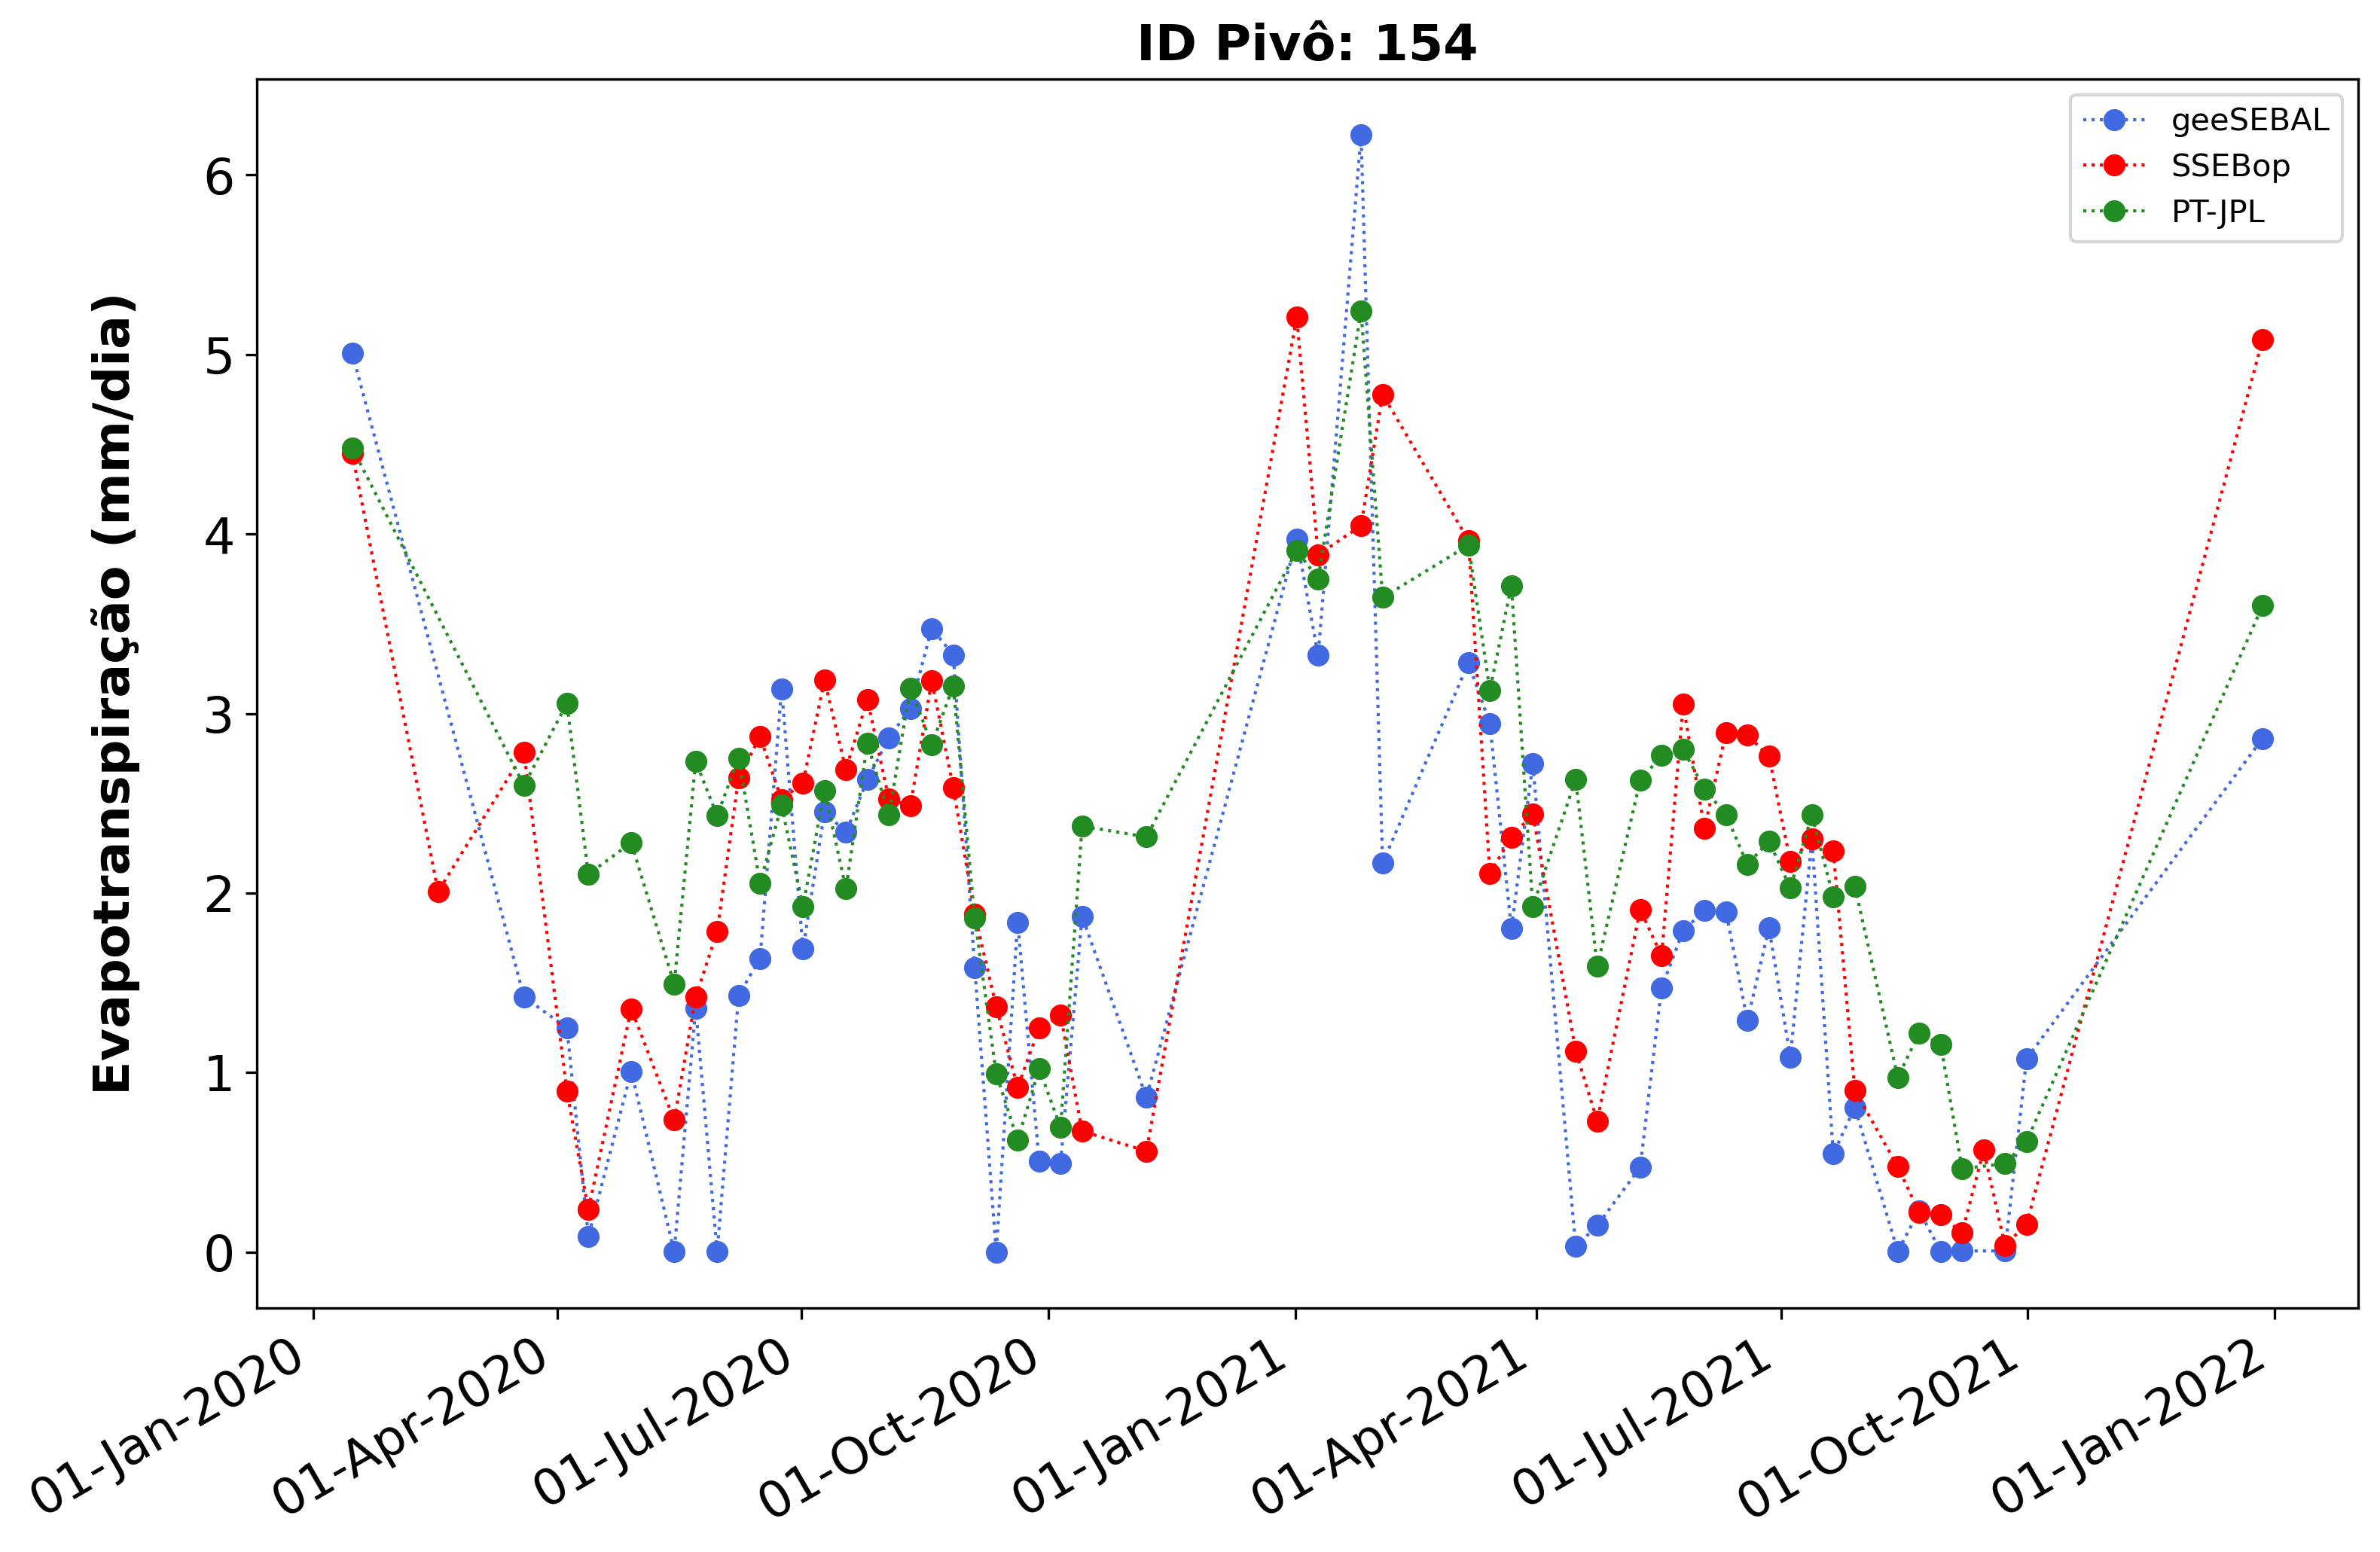

In [4]:
# ...gráfico da ET média no pivo selecionado
fig, ax = plt.subplots(figsize=(12,8), dpi=300)

geesebal['et'].plot(ax=ax, linewidth=1, linestyle=':', marker='o', markersize=6, color='royalblue', alpha=1)
ssebop['et'].plot(ax=ax, linewidth=1, linestyle=':', marker='o', markersize=6, color='red', alpha=1)
ptjpl['et'].plot(ax=ax, linewidth=1, linestyle=':', marker='o', markersize=6, color='forestgreen', alpha=1)

ax.set_title(title, fontsize=16, fontweight='bold')
ax.set_ylabel('Evapotranspiração (mm/dia)', fontsize=16, fontweight='bold', labelpad=20)
ax.set_xlabel('', fontsize=16, fontweight='bold', labelpad=20)
#ax.set_ylim(0,None)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(labels=['geeSEBAL', 'SSEBop', 'PT-JPL'])

# Formatar datas no eixo X para DD-MM-YY
formato_data = mdates.DateFormatter('%d-%b-%Y')
ax.xaxis.set_major_formatter(formato_data)
fig.autofmt_xdate()